------------------------------------------------------------------------------------------------------------
Sexratio = 0.25
Expected Ratio:  0.875
Expected Teta = 4*Ne*mu =  0.001125

Number of WF simulations:  44
WF Median Ratio:  0.8980033404657383
Median Pi Autosome:  0.0011288399999999999

Number of NWF simulations:  100
NWF Median Ratio:  0.9329055674253328
Median Pi Autosome:  0.0005764965000000001


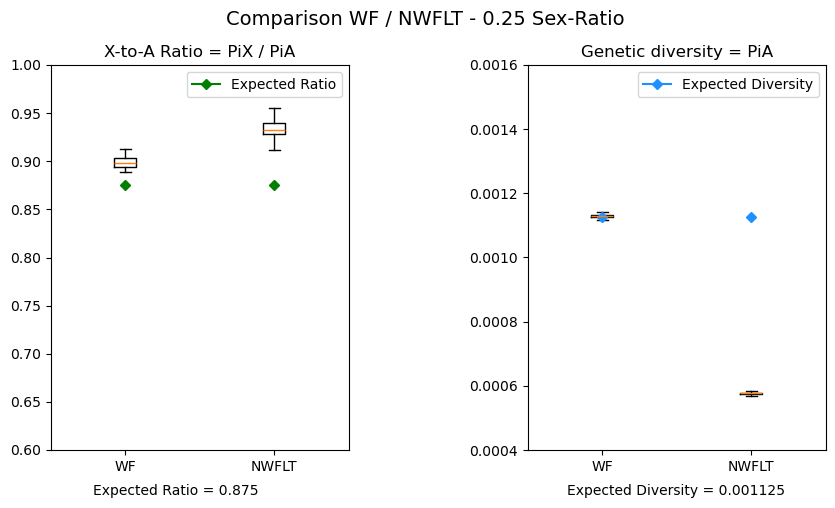

------------------------------------------------------------------------------------------------------------
Sexratio = 0.3
Expected Ratio:  0.85
Expected Teta = 4*Ne*mu =  0.00126

Number of WF simulations:  32
WF Median Ratio:  0.8669067814480151
Median Pi Autosome:  0.0012628000000000001

Number of NWF simulations:  100
NWF Median Ratio:  0.9084512044790032
Median Pi Autosome:  0.0006423564999999999


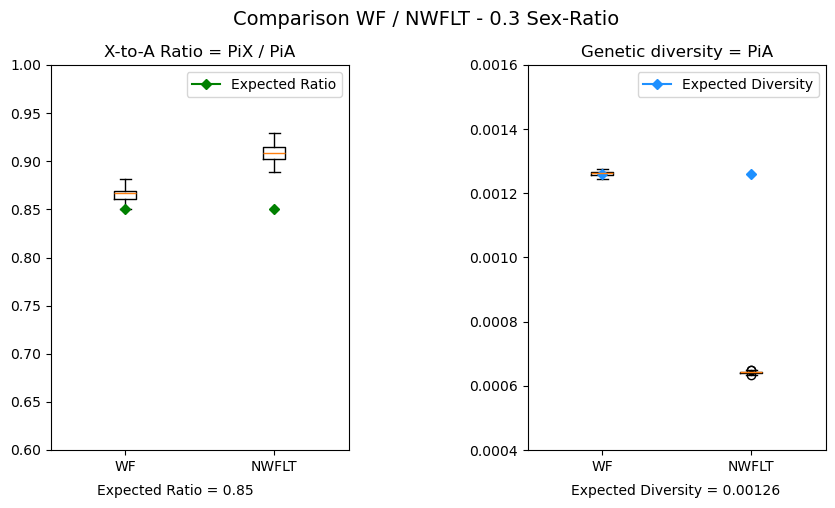

------------------------------------------------------------------------------------------------------------
Sexratio = 0.4
Expected Ratio:  0.8
Expected Teta = 4*Ne*mu =  0.00144

Number of WF simulations:  34
WF Median Ratio:  0.8054649176672228
Median Pi Autosome:  0.00143808

Number of NWF simulations:  100
NWF Median Ratio:  0.8668341595018942
Median Pi Autosome:  0.0007304855000000001


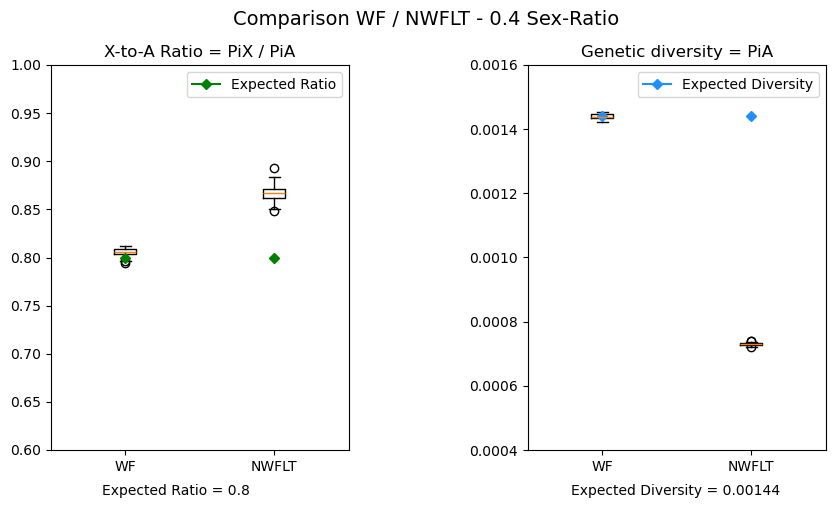

------------------------------------------------------------------------------------------------------------
Sexratio = 0.5
Expected Ratio:  0.75
Expected Teta = 4*Ne*mu =  0.0015

Number of WF simulations:  80
WF Median Ratio:  0.7509296755070742
Median Pi Autosome:  0.00150135

Number of NWF simulations:  100
NWF Median Ratio:  0.8296298135404605
Median Pi Autosome:  0.0007692104999999999


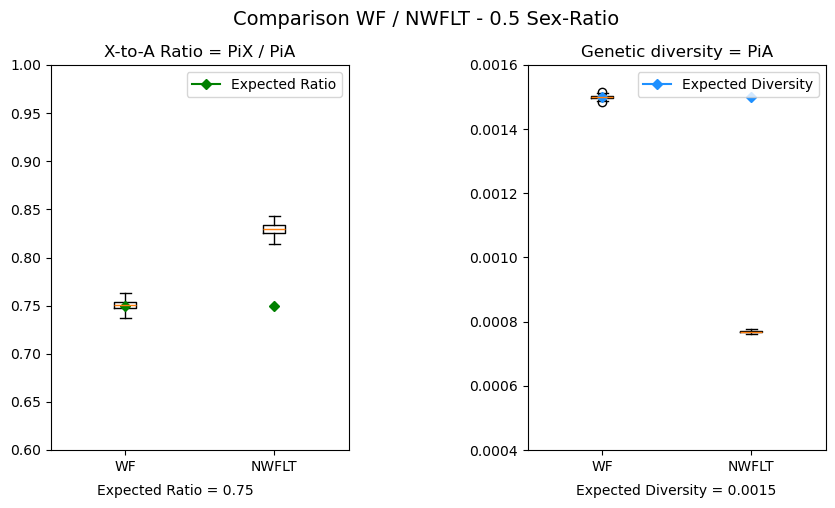

------------------------------------------------------------------------------------------------------------
Sexratio = 0.6
Expected Ratio:  0.7
Expected Teta = 4*Ne*mu =  0.00144

Number of WF simulations:  40
WF Median Ratio:  0.7054549518074623
Median Pi Autosome:  0.001440845

Number of NWF simulations:  100
NWF Median Ratio:  0.7914894567060418
Median Pi Autosome:  0.000764704


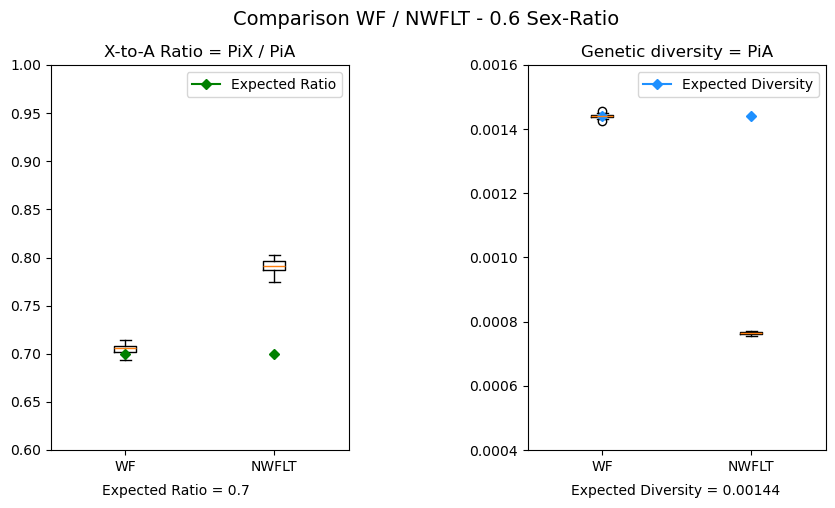

------------------------------------------------------------------------------------------------------------
Sexratio = 0.7
Expected Ratio:  0.65
Expected Teta = 4*Ne*mu =  0.00126

Number of WF simulations:  52
WF Median Ratio:  0.6626947232955229
Median Pi Autosome:  0.00126104

Number of NWF simulations:  100
NWF Median Ratio:  0.7420969730760042
Median Pi Autosome:  0.0007022595


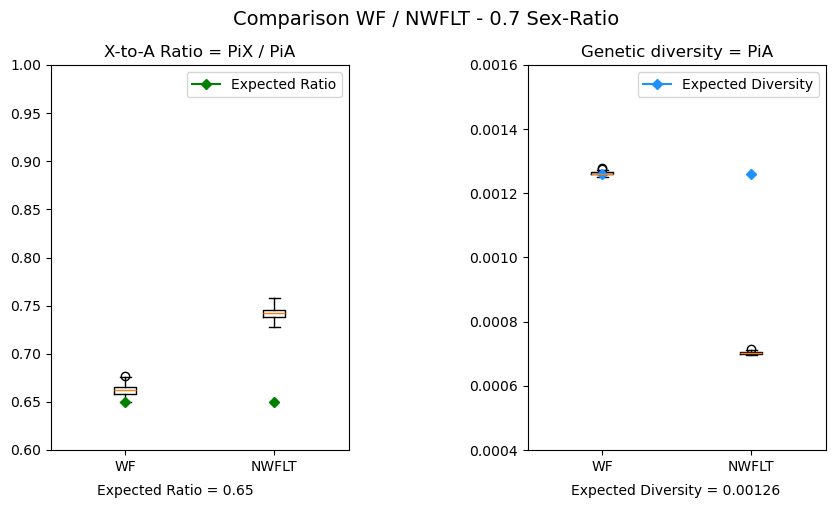

------------------------------------------------------------------------------------------------------------
Sexratio = 0.75
Expected Ratio:  0.625
Expected Teta = 4*Ne*mu =  0.001125

Number of WF simulations:  94
WF Median Ratio:  0.6425356667448199
Median Pi Autosome:  0.00112366

Number of NWF simulations:  97
NWF Median Ratio:  0.7030586991596695
Median Pi Autosome:  0.000612914


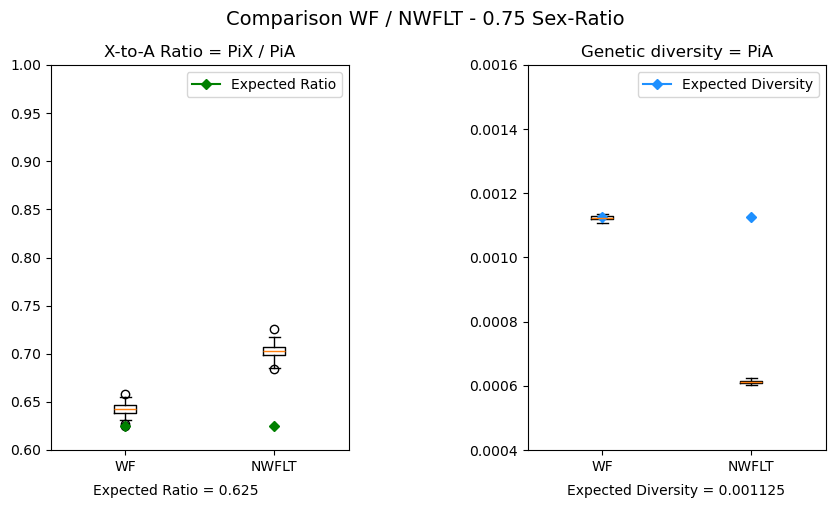

In [6]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Pi_WF_NWFLT/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Pi_WF_NWFLT/"
LSexRatio = [0.25,0.3,0.4,0.5,0.6,0.7,0.75]


for SR in LSexRatio:
    WF_Pi_ratio = []
    NWF_Pi_ratio = []
    WF_PiA = []
    NWF_PiA = []
    for NUM in range(1,501):
        File = FOLDER+"WF_SexRatio"+str(SR)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                WF_Pi_ratio.append(float(Values[1])/float(Values[0]))
                WF_PiA.append(float(Values[0]))
                Text.close()
            
        File = FOLDER+"NWF_LT_SEXRATIO"+str(SR)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                NWF_PiA.append(float(Values[0]))
                NWF_Pi_ratio.append(float(Values[1])/float(Values[0]))
                Text.close()
    
    expected_ratio = 1-SR*0.5
    Ne = 4*750*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
    expected_teta = round (4*Ne*40*1.25e-8,10)
    WF_median = np.median(WF_Pi_ratio)
    NWF_median = np.median(NWF_Pi_ratio)
    WF_PiA_median = np.median(WF_PiA)
    NWF_PiA_median = np.median(NWF_PiA)
    print("------------------------------------------------------------------------------------------------------------")
    print("Sexratio = "+str(SR))
    print("Expected Ratio: ",expected_ratio)
    print("Expected Teta = 4*Ne*mu = ", expected_teta )
    print()
    print("Number of WF simulations: ",len(WF_Pi_ratio))
    print("WF Median Ratio: ",WF_median)
    print("Median Pi Autosome: ",WF_PiA_median)
    print()
    print("Number of NWF simulations: ",len(NWF_Pi_ratio))
    print("NWF Median Ratio: ",NWF_median)
    print("Median Pi Autosome: ",NWF_PiA_median)


    fig, ax = mp.subplots(1,2,figsize=(10, 5))
    fig.subplots_adjust(wspace=0.6)
    fig.suptitle(f"Comparison WF / NWFLT - {SR} Sex-Ratio", fontsize=14, y=0.99)

    ax[0].boxplot([WF_Pi_ratio,NWF_Pi_ratio],tick_labels=["WF","NWFLT"])
    ax[0].set_title("X-to-A Ratio = PiX / PiA")
    ax[0].plot(1, expected_ratio, marker='D', color='green', markersize=5, label='Expected Ratio')
    ax[0].plot(2, expected_ratio, marker='D', color='green', markersize=5)
    ax[0].set_ylim([0.6, 1])
    ax[0].legend()

    ax[1].boxplot([WF_PiA,NWF_PiA],tick_labels=["WF","NWFLT"])
    ax[1].set_title("Genetic diversity = PiA")
    ax[1].plot(1, expected_teta, marker='D', color='dodgerblue', markersize=5, label='Expected Diversity')
    ax[1].plot(2, expected_teta, marker='D', color='dodgerblue', markersize=5)
    ax[1].set_ylim([0.0004, 0.0016])
    ax[1].legend()

    fig.text(0.25, 0.02, 'Expected Ratio = '+str(expected_ratio), 
         ha='center', fontsize=10)

    fig.text(0.75, 0.02, 'Expected Diversity = '+str(expected_teta), 
         ha='center', fontsize=10)
    
    fig.savefig(FOLDER_output+'WF_NWFLT_SexRatio'+str(SR)+'.png') 

    mp.show()

**Analyse *X-to-A ratio*:** 
- As Expected, the *X-to-A ratio* decrease when the *sex ratio* increase, for both WF and NWF models.
- The WF models are more accurate than the NWF ones. The *X-to-A ratios* of NWF are always higher than the WF ones. WF models are very accurate (except for a sex ratio of 0.25).
- The NWF model may differ because of the age structure or the overlapping generations, the only differences between the two types of models. 

**Analyse *Genetic Diversity teta*:** 
- We have nearly the same results as before : the WF models are much more accurate than the NWF ones. 
- This time, the *genetic diversity* in NWF models is lower than the expected teta.

